
## Car Price Prediction

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation
 <font> 
<div align="center"> <font size="2" color="red"><b><!--# For Citi Internal training purpose only #--></b></font> </div>

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [233]:
# reading the dataset
cars = pd.read_csv("CarPrice_Assignment.csv")

In [234]:
# summary of the dataset: 205 rows, 26 columns, no null values
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [235]:
# head
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [236]:
cars.shape

(205, 26)

#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [237]:
# symboling: -2 (least risky) to +3 most risky
# Most cars are 0,1,2
cars['symboling'].astype('category').value_counts()



0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

In [238]:
# aspiration: An (internal combustion) engine property showing 
# whether the oxygen intake is through standard (atmospheric pressure)
# or through turbocharging (pressurised oxygen intake)

cars['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [239]:
# drivewheel: frontwheel, rarewheel or four-wheel drive 
cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


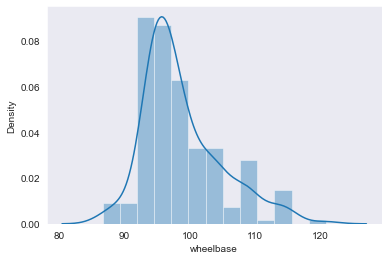

In [240]:
# wheelbase: distance between centre of front and rarewheels
sns.distplot(cars['wheelbase'])
plt.show()

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


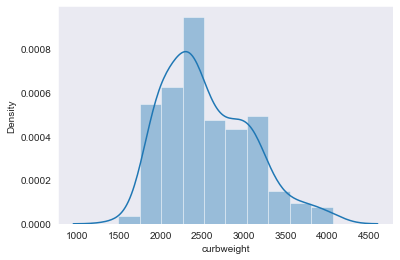

In [241]:
# curbweight: weight of car without occupants or baggage
sns.distplot(cars['curbweight'])
plt.show()

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


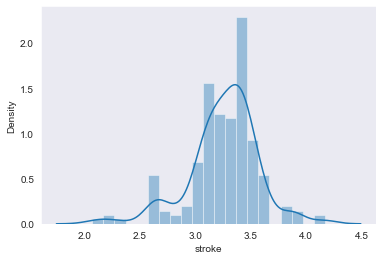

In [242]:
# stroke: volume of the engine (the distance traveled by the 
# piston in each cycle)
sns.distplot(cars['stroke'])
plt.show()

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


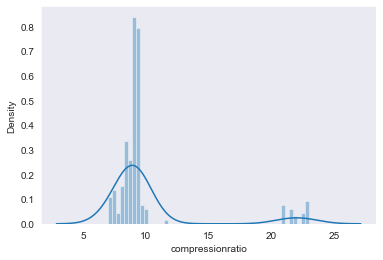

In [243]:
# compression ration: ration of volume of compression chamber 
# at largest capacity to least capacity
sns.distplot(cars['compressionratio'])
plt.show()

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


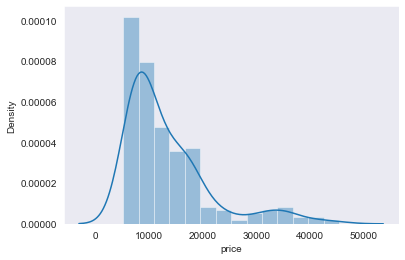

In [244]:
# target variable: price of car
sns.distplot(cars['price'])
plt.show()

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [245]:
# all numeric (float and int) variables in the dataset
cars_numeric = cars.select_dtypes(include=['float64', 'int64'])
cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Here, although the variable ```symboling``` is numeric (int), we'd rather treat it as categorical since it has only 6 discrete values. Also, we do not want 'car_ID'.

In [246]:
# dropping symboling and car_ID 
cars_numeric = cars_numeric.drop(['symboling', 'car_ID'], axis=1)
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Let's now make a pairwise scatter plot and observe linear relationships.

<Figure size 1440x720 with 0 Axes>

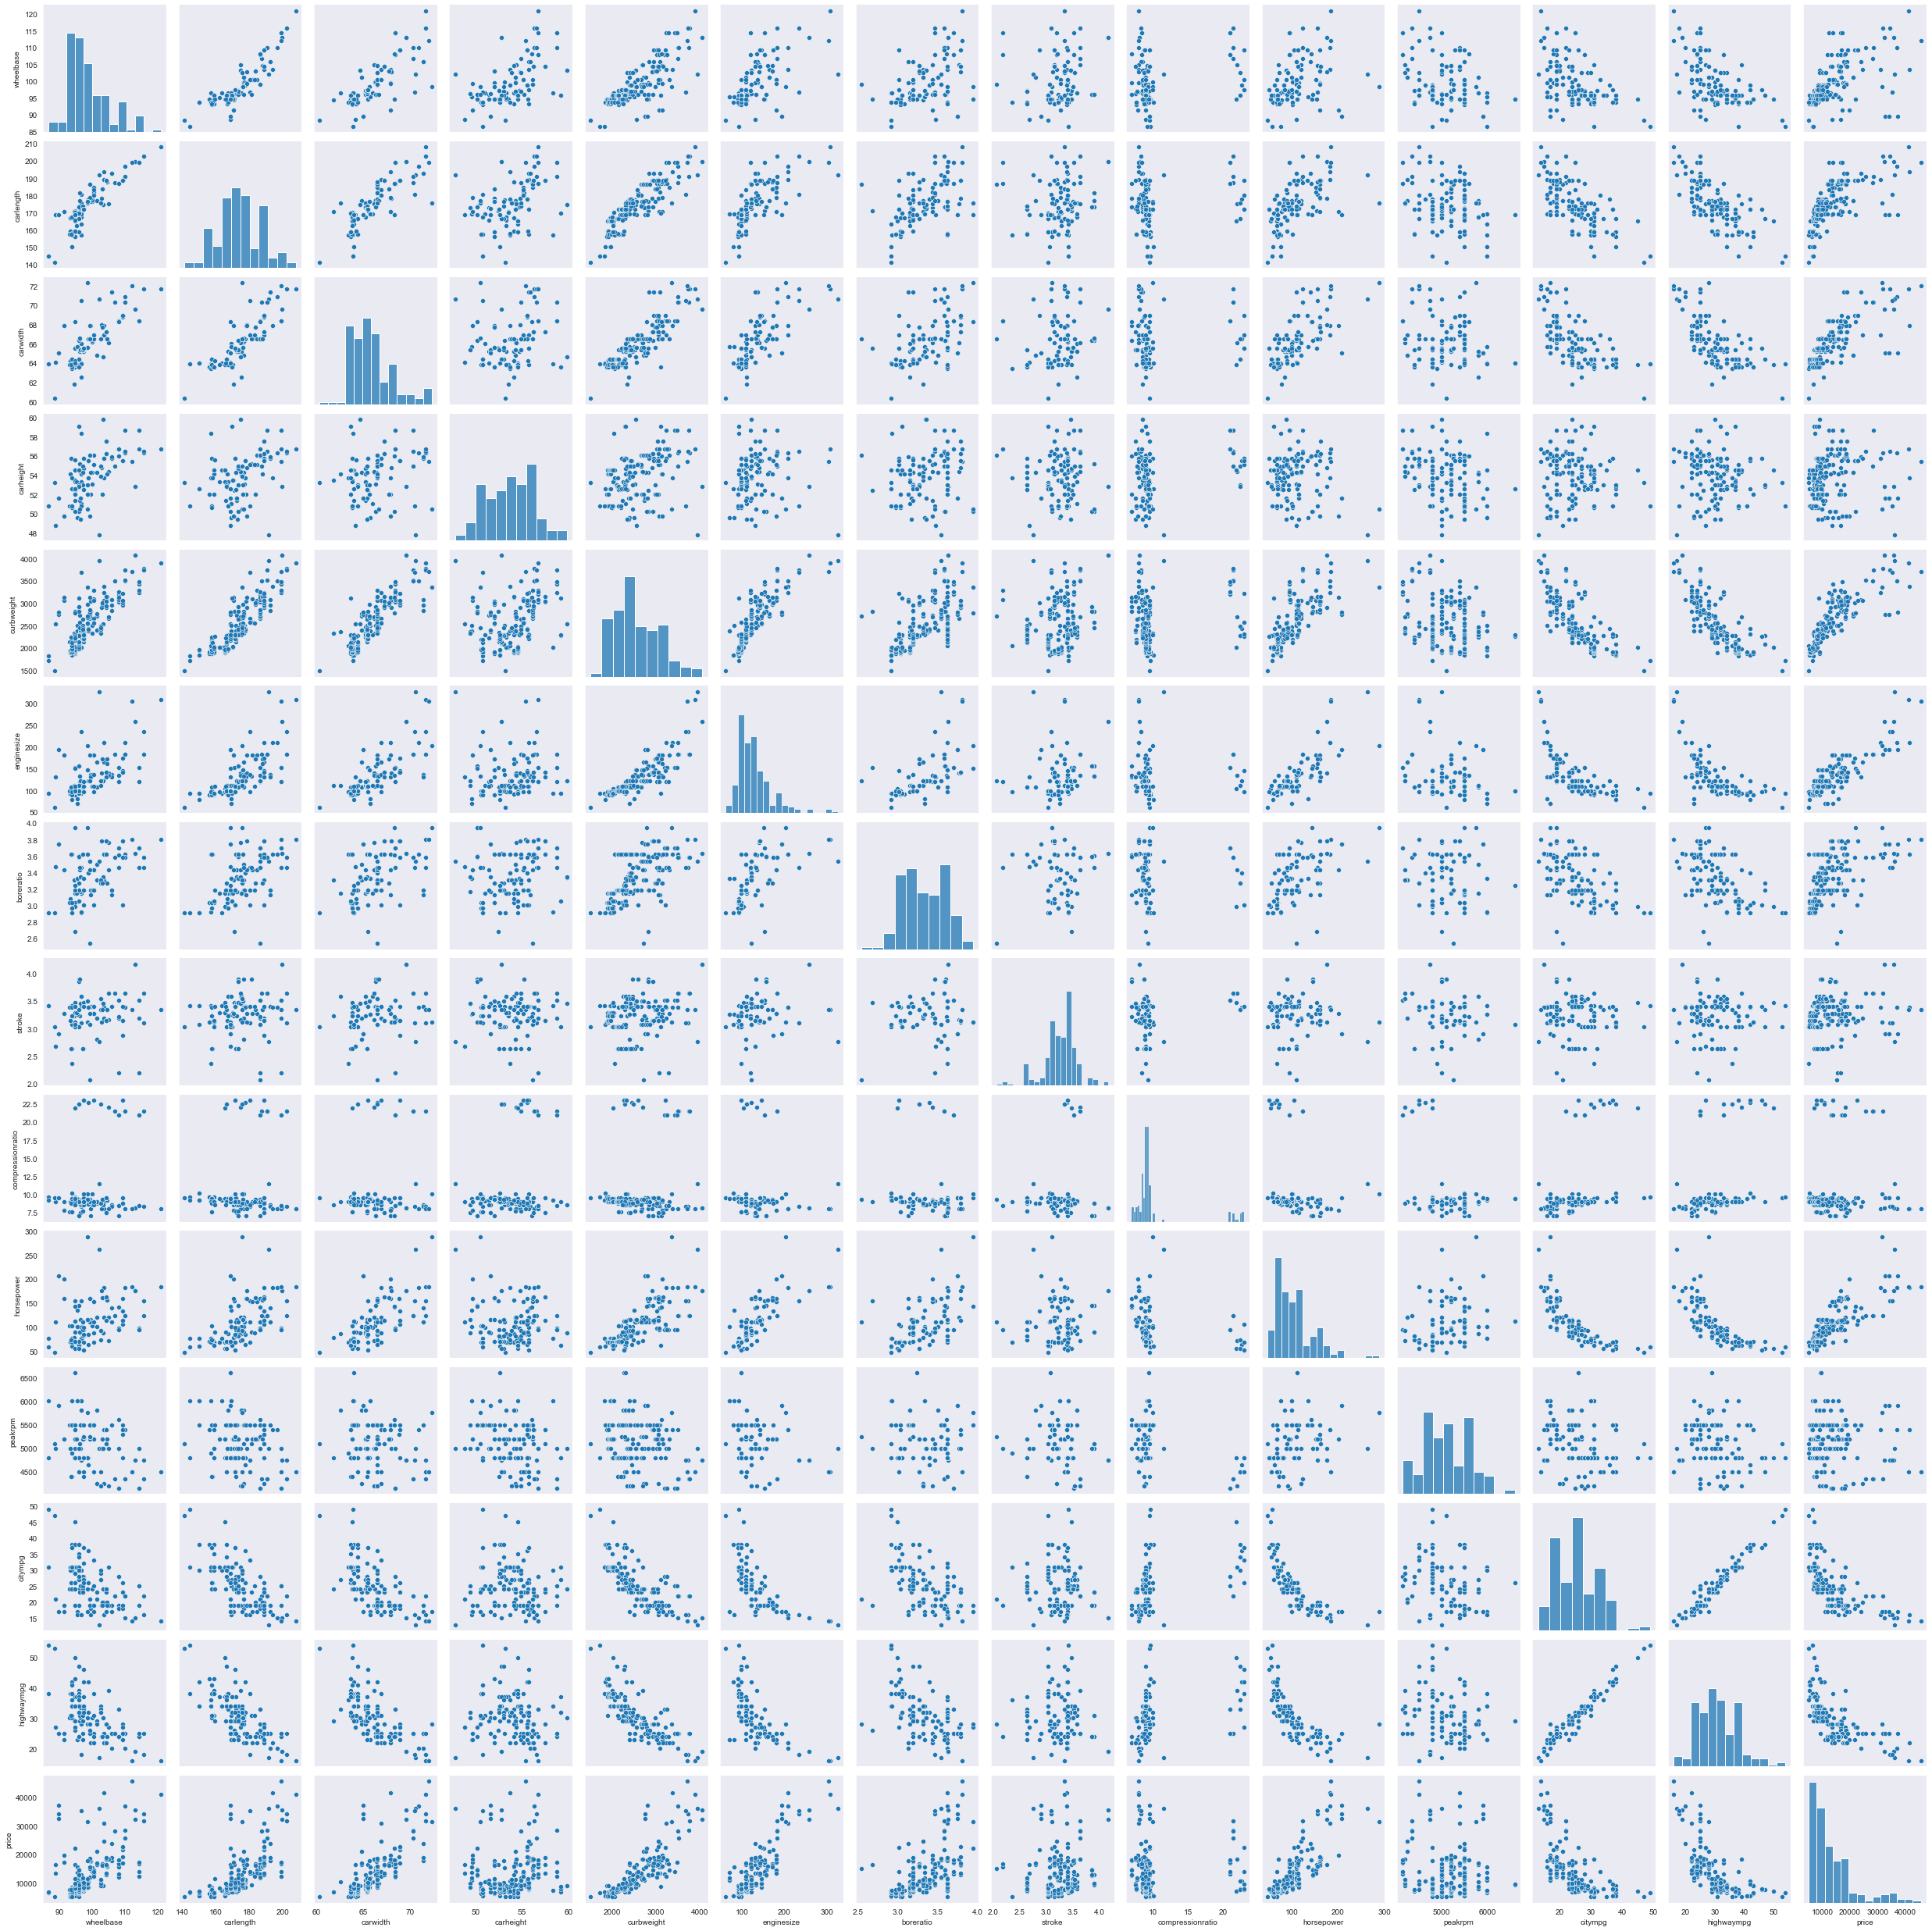

In [247]:
# paiwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(cars_numeric)
plt.show()

In [248]:
cars_numeric.corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


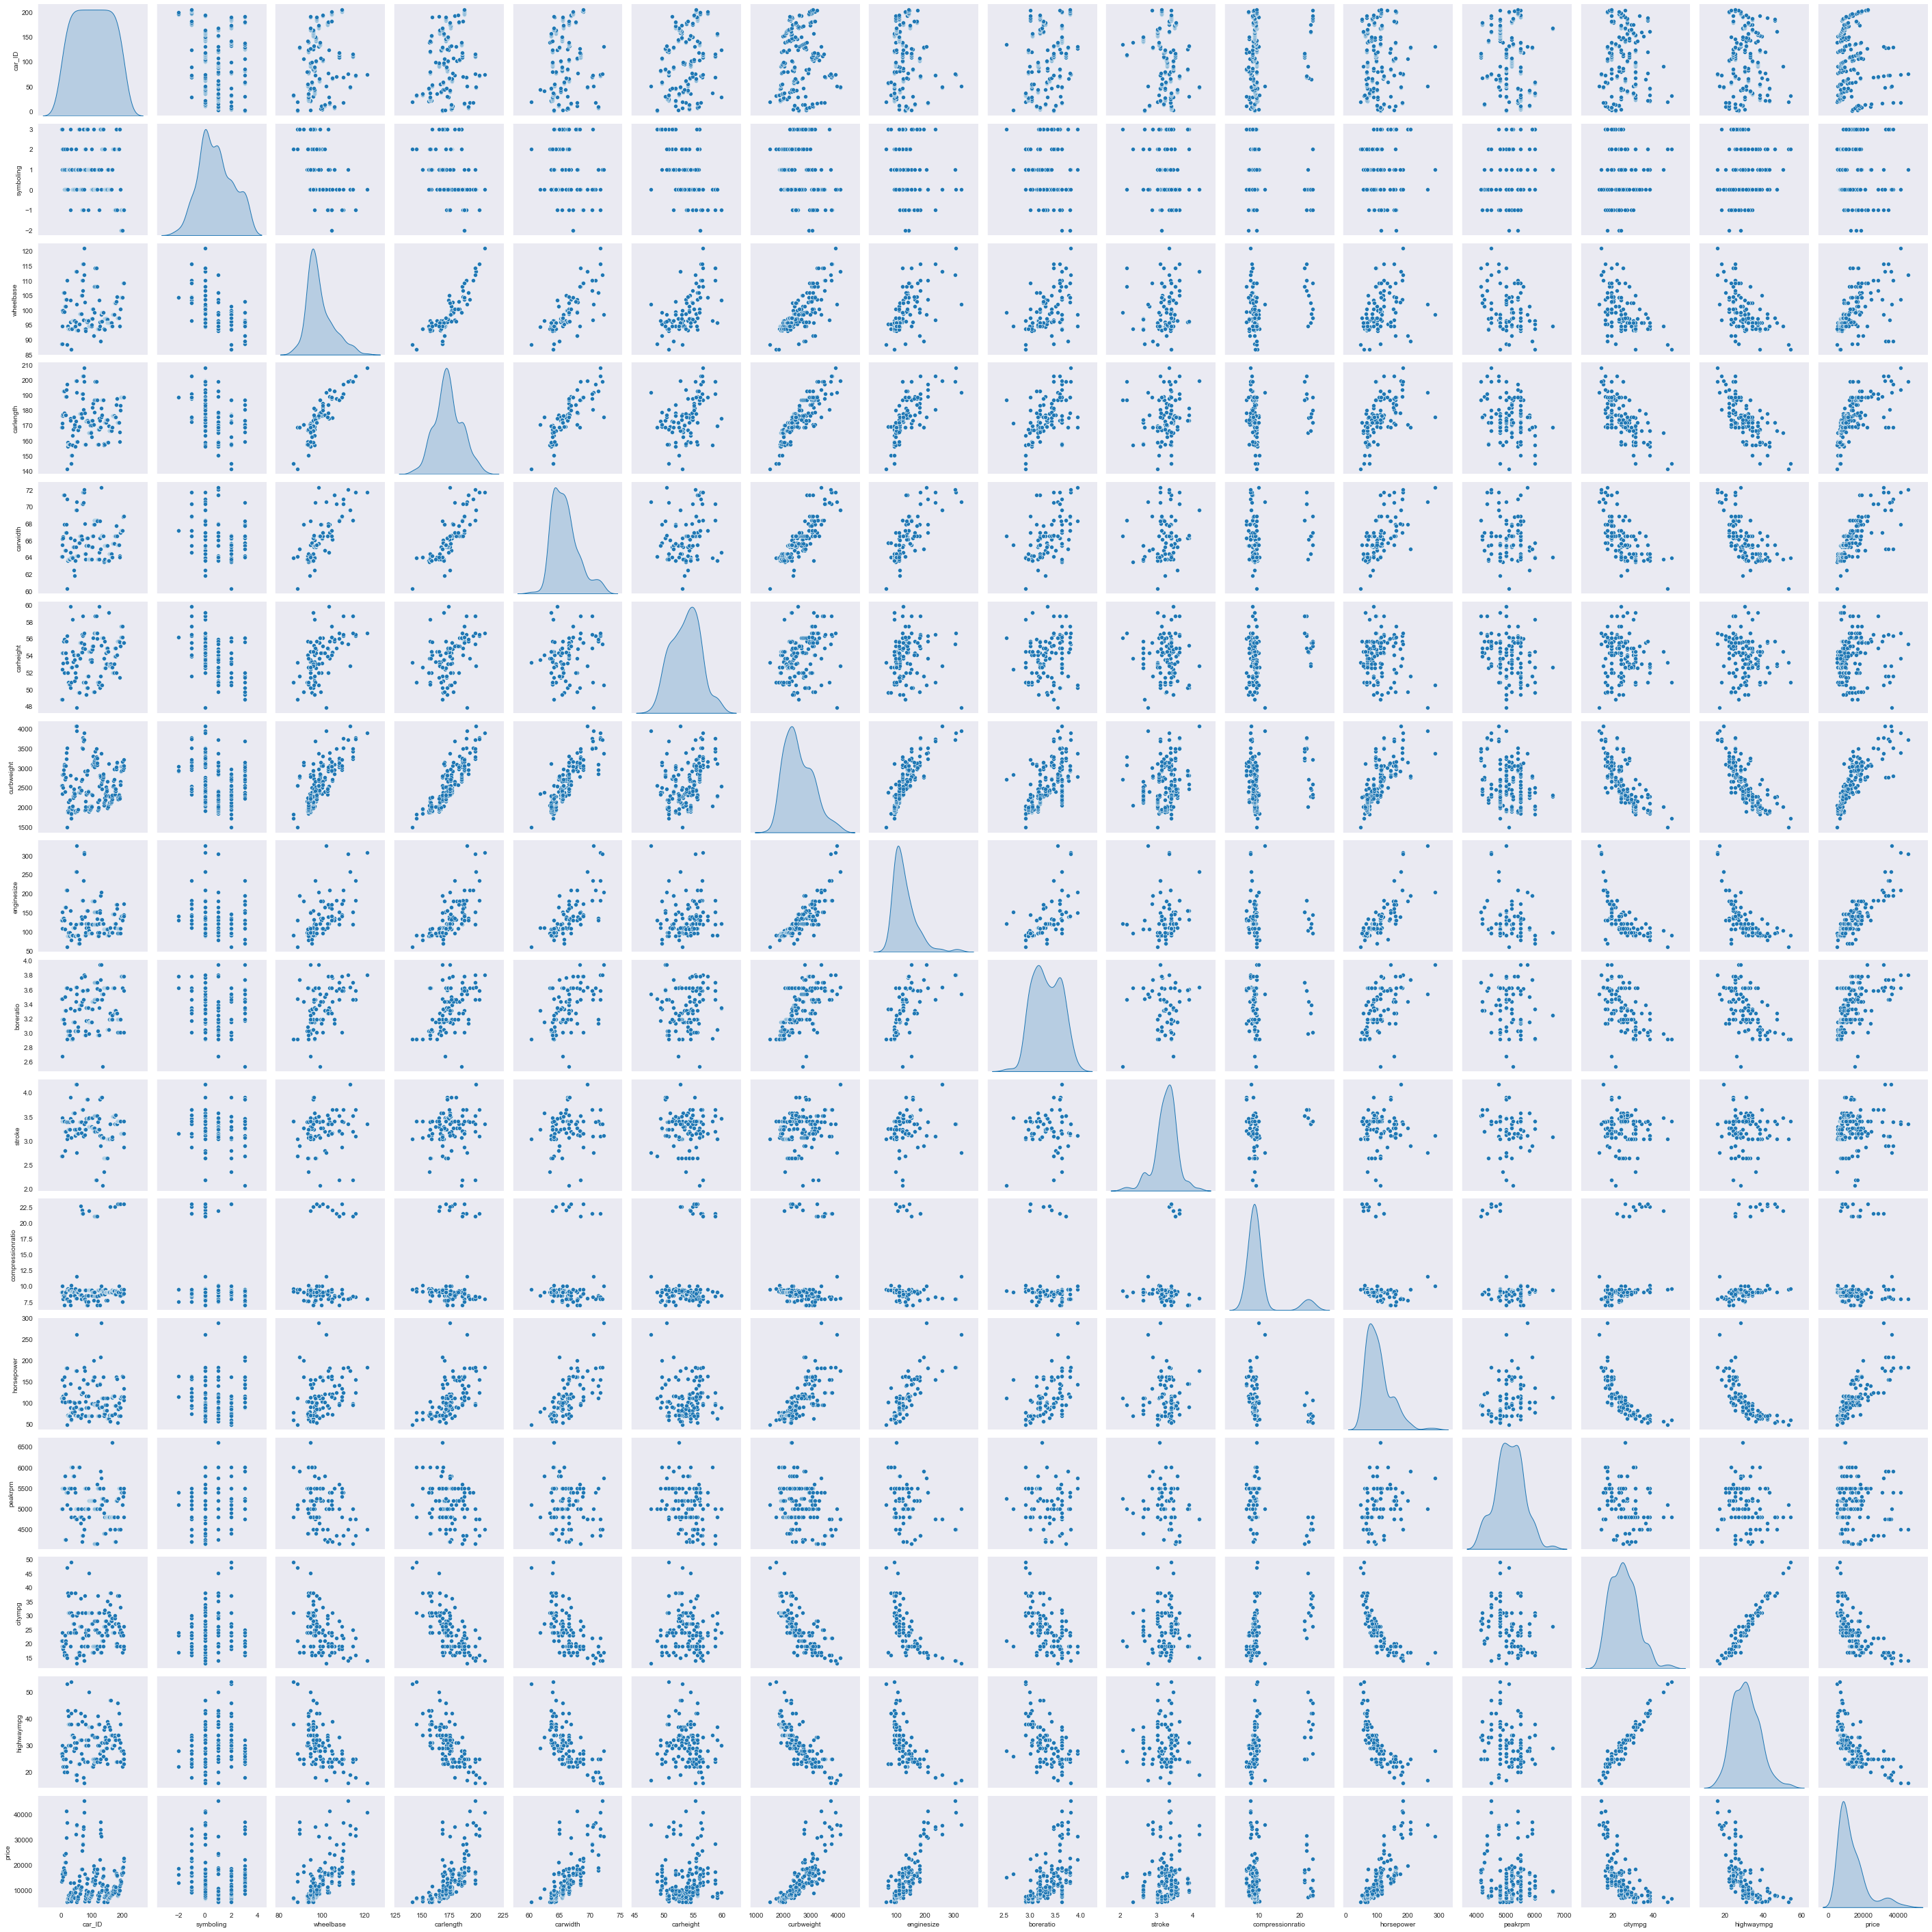

In [142]:
sns.pairplot(cars,diag_kind='kde')

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [249]:
# correlation matrix
cor = cars_numeric.corr()
cor

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


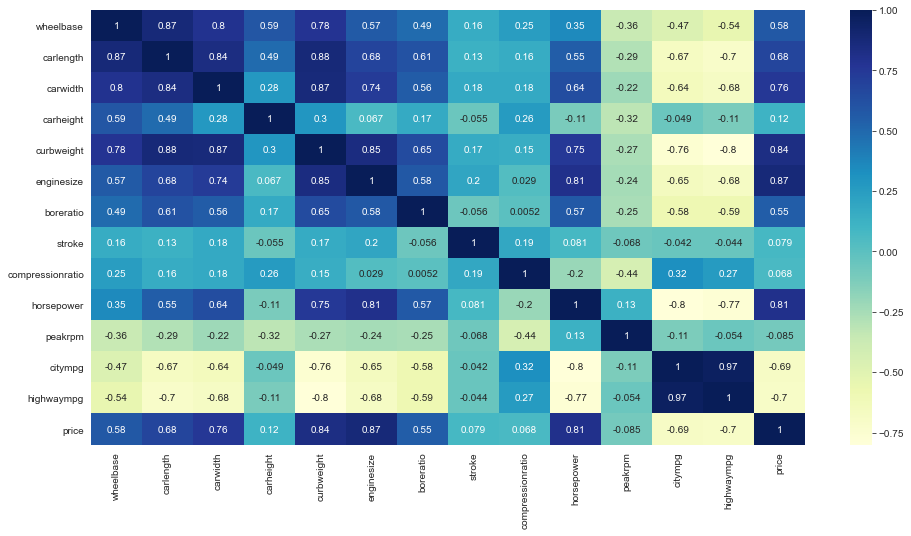

In [250]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


The heatmap shows some useful insights:

Correlation of price with independent variables:
- Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower (notice how all of these variables represent the size/weight/engine power of the car)

- Price is negatively correlated to ```citympg``` and ```highwaympg``` (-0.70 approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower (think Maruti Alto/Swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)

Correlation among independent variables:
- Many independent variables are highly correlated (look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated 


Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except ```symboling```, which should rather be a categorical variable (so that dummy variable are created for the categories).

Note that it *can* be used in the model as a numeric variable also. 



In [251]:
# variable formats
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [252]:
# converting symboling to categorical
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Netx, we need to extract the company name from the column ```CarName```. 

In [253]:
# CarName: first few entries
cars['CarName'][:30]

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
5                      audi fox
6                    audi 100ls
7                     audi 5000
8                     audi 4000
9           audi 5000s (diesel)
10                     bmw 320i
11                     bmw 320i
12                       bmw x1
13                       bmw x3
14                       bmw z4
15                       bmw x4
16                       bmw x5
17                       bmw x3
18             chevrolet impala
19        chevrolet monte carlo
20          chevrolet vega 2300
21                dodge rampage
22          dodge challenger se
23                   dodge d200
24            dodge monaco (sw)
25           dodge colt hardtop
26              dodge colt (sw)
27         dodge coronet custom
28            dodge dart custom
29    dodge coronet custom (sw)
Name: CarName, dtype: object

Notice that the carname is what occurs before a space, e.g. alfa-romero, audi, chevrolet, dodge, bmx etc.

Thus, we need to simply extract the string before a space. There are multiple ways to do that.




In [254]:
import re

# regex: any alphanumeric sequence before a space, may contain a hyphen
p = re.compile(r'\w+-?\w+')
carnames = cars['CarName'].apply(lambda x: re.findall(p, x)[0])
print(carnames)

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object


Let's create a new column to store the compnay name and check whether it looks okay.

In [255]:
import re

# New column car_company
cars['car_company'] = cars['CarName'].apply(lambda x: re.findall(p, x)[0])

In [256]:
# look at all values 
cars['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
vw              2
renault         2
maxda           2
toyouta         1
mercury         1
vokswagen       1
Nissan          1
porcshce        1
Name: car_company, dtype: int64

Notice that **some car-company names are misspelled** - vw and vokswagen should be volkswagen, porcshce should be porsche, toyouta should be toyota, Nissan should be nissan, maxda should be mazda etc.

This is a data quality issue, let's solve it.

In [257]:
# replacing misspelled car_company names

# volkswagen
cars.loc[(cars['car_company'] == "vw") | 
         (cars['car_company'] == "vokswagen")
         , 'car_company'] = 'volkswagen'

# porsche
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'

In [258]:
cars['car_company'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

The ```car_company``` variable looks okay now. Let's now drop the car name variable.

In [259]:
# drop carname variable
cars = cars.drop('CarName', axis=1)

In [260]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [261]:
# outliers
cars.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [262]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

### Missing value and Outlier detection

In [263]:
cars.isnull().any()

car_ID              False
symboling           False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
car_company         False
dtype: bool

### No missing values in  any columns

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


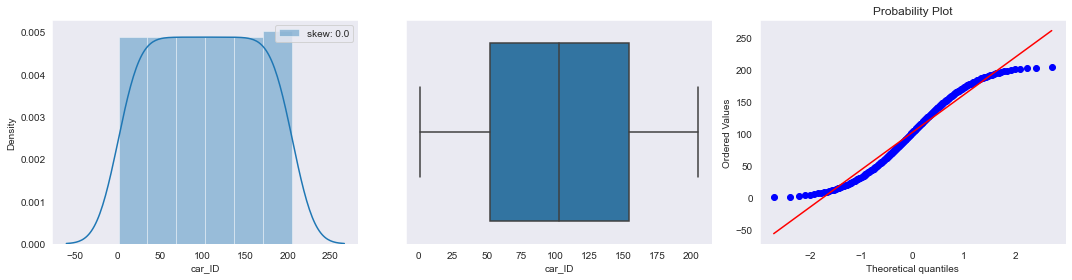

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


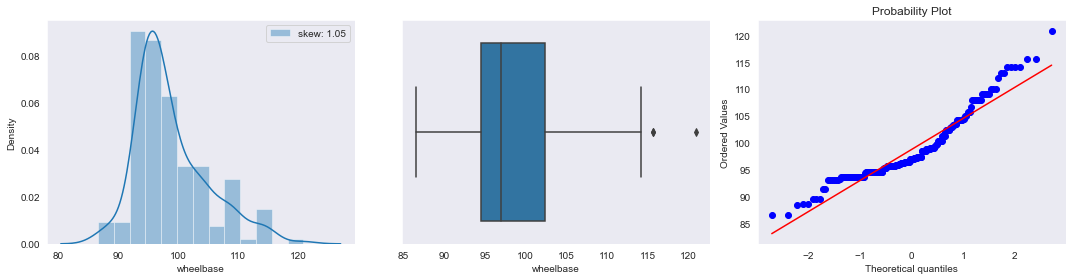

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


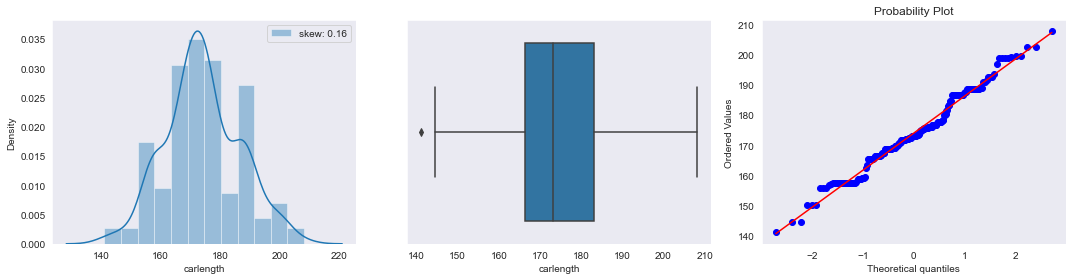

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


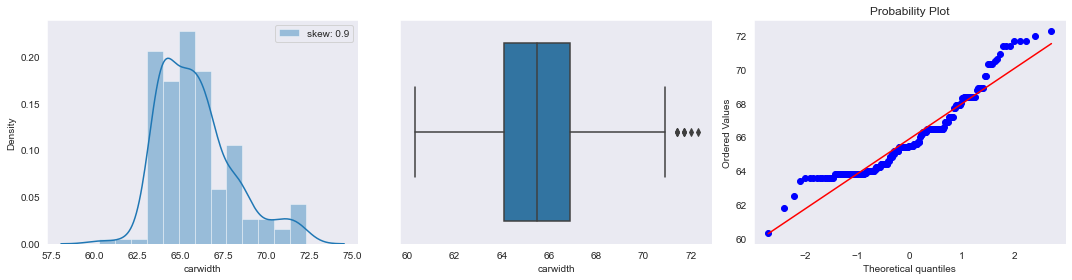

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


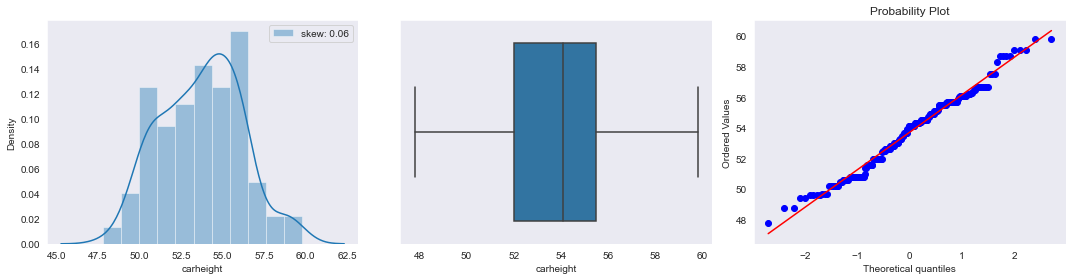

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


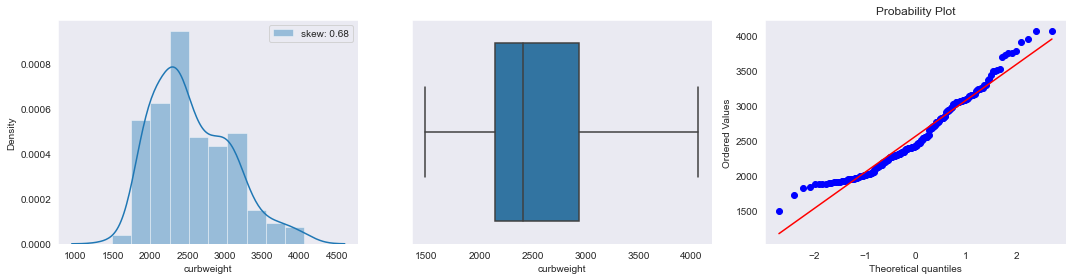

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


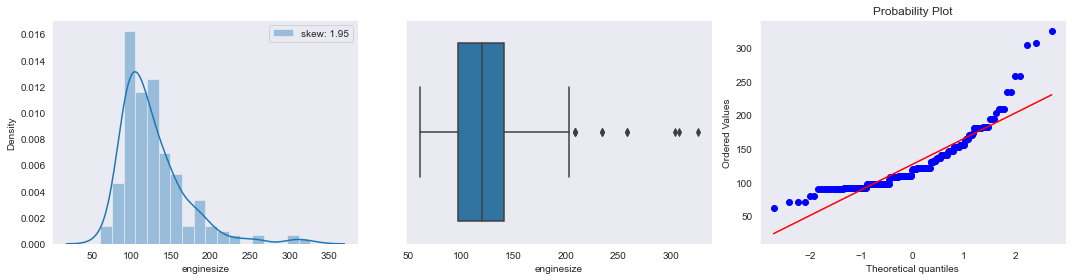

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


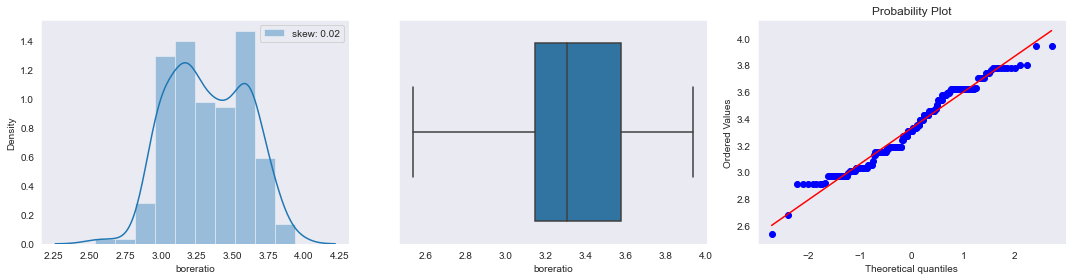

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


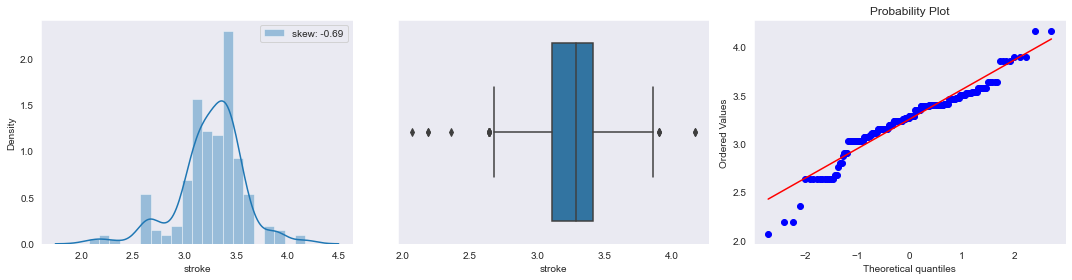

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


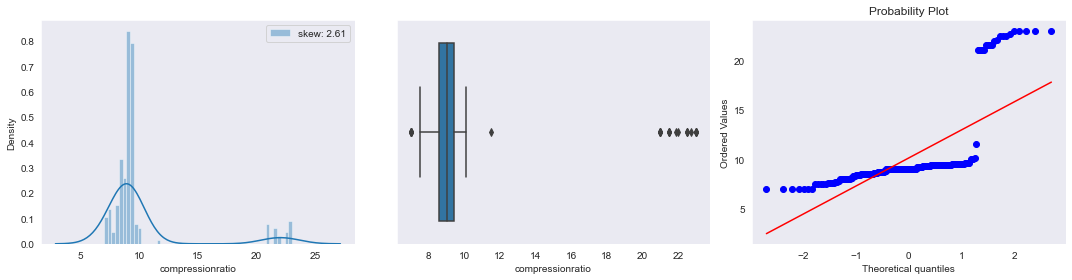

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


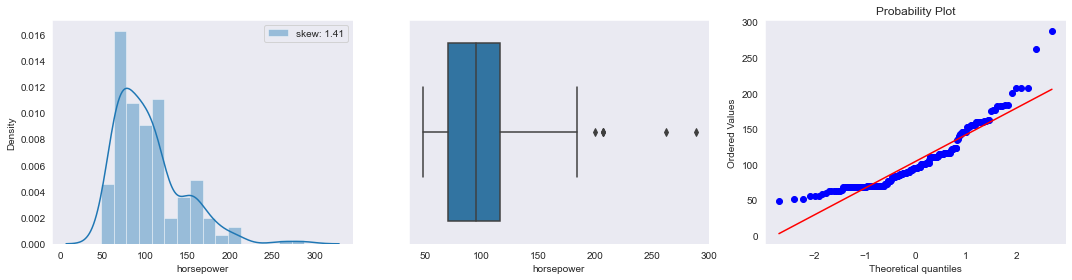

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


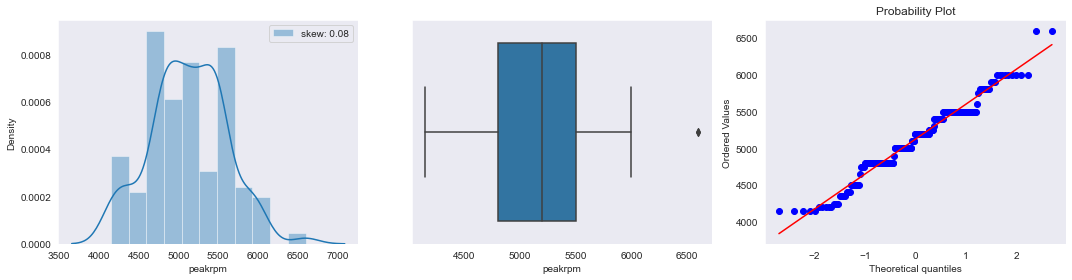

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


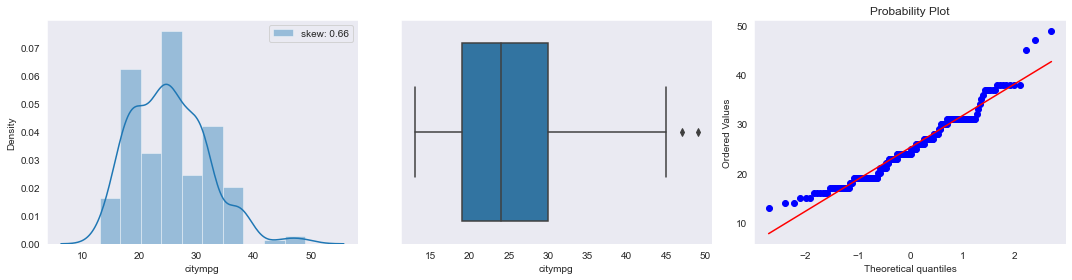

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


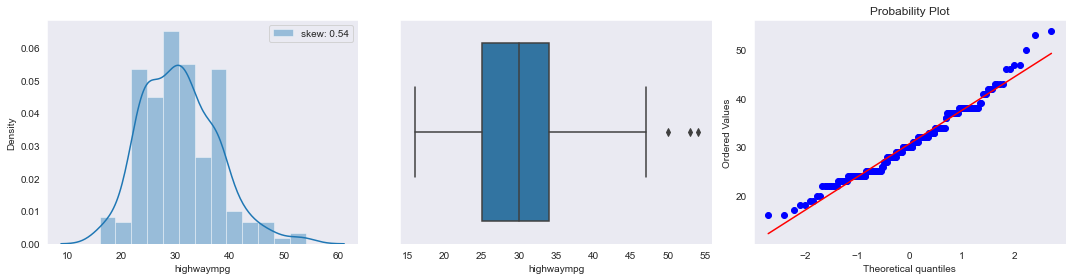

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


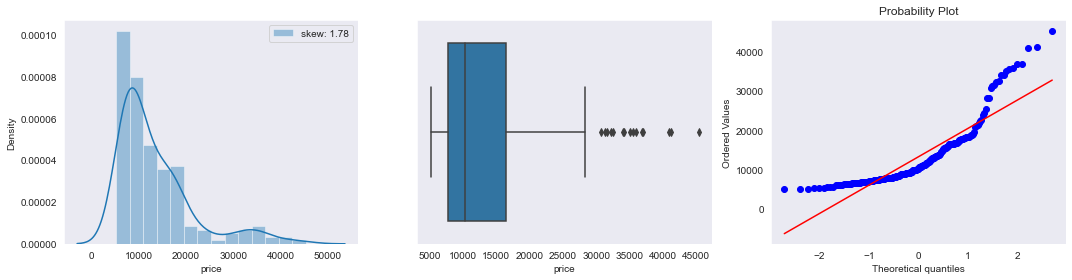

In [264]:
# Ploting graph for each varables to understand outliers
from scipy import stats

df=cars
sns.set_style('dark')
for col in cars.describe().columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [265]:
# Finding skew before and after to compare the shape after treatment 
# We can use SD, IQR, SKEW etc

for X in cars.describe().columns:
    print('The skewness and Max_Z-Score value for {} is {} and {} respectively'.format(X,cars[X].skew(),np.max(abs(stats.zscore(cars[X])))))

The skewness and Max_Z-Score value for car_ID is 0.0 and 1.7236222864675912 respectively
The skewness and Max_Z-Score value for wheelbase is 1.0502137758714858 and 3.6862252135740365 respectively
The skewness and Max_Z-Score value for carlength is 0.1559537713215604 and 2.766741434550069 respectively
The skewness and Max_Z-Score value for carwidth is 0.904003498786254 and 2.98705556854827 respectively
The skewness and Max_Z-Score value for carheight is 0.06312273247192804 and 2.492301615471819 respectively
The skewness and Max_Z-Score value for curbweight is 0.681398189052588 and 2.9079877723438705 respectively
The skewness and Max_Z-Score value for enginesize is 1.9476550452788108 and 4.7926789111561625 respectively
The skewness and Max_Z-Score value for boreratio is 0.02015641810424137 and 2.9230489468762504 respectively
The skewness and Max_Z-Score value for stroke is -0.6897045784233837 and 3.7893106699169268 respectively
The skewness and Max_Z-Score value for compressionratio is 2

In [266]:
cars['enginesize'].quantile([0.05, 0.25, 0.5, 0.9,0.95,0.96,0.97,0.98,0.99,1.0])

0.05     90.00
0.25     97.00
0.50    120.00
0.90    181.00
0.95    201.20
0.96    209.00
0.97    231.00
0.98    256.08
0.99    302.16
1.00    326.00
Name: enginesize, dtype: float64

In [267]:
cars.nunique()

car_ID              205
symboling             6
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
car_company          22
dtype: int64

### If needed to treat outlier then use the below method :IQR

In [268]:
col_sel=['compressionratio','enginesize','carwidth','wheelbase']
def iqr_capping(df, cols, factor):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,df[col])
        df[col] = np.where(df[col]<lower_whisker, lower_whisker,df[col]) 

iqr_capping(cars, col_sel, 1.5)

In [269]:
# Finding skew before and after to compare the shape after treatment 
# We can use SD, IQR, SKEW etc

for X in cars.describe().columns:
    print('The skewness and Max_Z-Score value for {} is {} and {} respectively'.format(X,cars[X].skew(),np.max(abs(stats.zscore(cars[X])))))
    

The skewness and Max_Z-Score value for car_ID is 0.0 and 1.7236222864675912 respectively
The skewness and Max_Z-Score value for wheelbase is 0.9249160965378501 and 2.647995925478819 respectively
The skewness and Max_Z-Score value for carlength is 0.1559537713215604 and 2.766741434550069 respectively
The skewness and Max_Z-Score value for carwidth is 0.7762776833615744 and 2.6873523757623885 respectively
The skewness and Max_Z-Score value for carheight is 0.06312273247192804 and 2.492301615471819 respectively
The skewness and Max_Z-Score value for curbweight is 0.681398189052588 and 2.9079877723438705 respectively
The skewness and Max_Z-Score value for enginesize is 0.9084533133862073 and 2.432160443144792 respectively
The skewness and Max_Z-Score value for boreratio is 0.02015641810424137 and 2.9230489468762504 respectively
The skewness and Max_Z-Score value for stroke is -0.6897045784233837 and 3.7893106699169268 respectively
The skewness and Max_Z-Score value for compressionratio is 

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [270]:
# split into X and y
X =cars.drop('price', axis=1)
y =cars['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [271]:
# creating dummy variables for categorical variables

# subset all categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [272]:
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical)
cars_dummies.head()

,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_alfa-romero,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [273]:
# drop categorical variables 
X = X.drop(list(cars_categorical.columns), axis=1)

In [274]:
# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)

In [275]:
pd.set_option('display.max_columns', None)

In [276]:
X.tail()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_alfa-romero,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
200,201,109.1,188.8,68.9,55.5,2952,141.0,3.78,3.15,9.5,114,5400,23,28,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
201,202,109.1,188.8,68.8,55.5,3049,141.0,3.78,3.15,8.7,160,5300,19,25,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
202,203,109.1,188.8,68.9,55.5,3012,173.0,3.58,2.87,8.8,134,5500,18,23,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
203,204,109.1,188.8,68.9,55.5,3217,145.0,3.01,3.40,10.6,106,4800,26,27,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
204,205,109.1,188.8,68.9,55.5,3062,141.0,3.78,3.15,9.5,114,5400,19,25,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [277]:
X.drop('car_ID', axis=1, inplace=True)

In [278]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [279]:
X_scaled = scalar.fit_transform(X)

In [280]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_alfa-romero,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,-1.723005,-0.426521,-0.858695,-2.020417,-0.014566,0.160196,0.519071,-1.839377,-0.049433,0.174483,-0.262960,-0.646553,-0.546059,-0.121867,-0.346726,-0.696784,-0.598010,-0.430083,2.567604,-0.328798,0.328798,0.469295,-0.469295,-1.130388,1.130388,5.759051,-0.201517,-0.720082,-0.938474,-0.372678,-0.214286,-1.188177,1.302831,0.121867,-0.121867,4.010403,-0.070014,-0.249351,-1.611363,-0.280976,-0.260208,-0.141069,-0.158114,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,8.205689,-0.188025,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
1,-1.723005,-0.426521,-0.858695,-2.020417,-0.014566,0.160196,0.519071,-1.839377,-0.049433,0.174483,-0.262960,-0.646553,-0.546059,-0.121867,-0.346726,-0.696784,-0.598010,-0.430083,2.567604,-0.328798,0.328798,0.469295,-0.469295,-1.130388,1.130388,5.759051,-0.201517,-0.720082,-0.938474,-0.372678,-0.214286,-1.188177,1.302831,0.121867,-0.121867,4.010403,-0.070014,-0.249351,-1.611363,-0.280976,-0.260208,-0.141069,-0.158114,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,8.205689,-0.188025,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
2,-0.717590,-0.231513,-0.184978,-0.543527,0.514882,0.809329,-2.404880,0.685946,-0.049433,1.264536,-0.262960,-0.953012,-0.691627,-0.121867,-0.346726,-0.696784,1.672213,-0.430083,-0.389468,-0.328798,0.328798,0.469295,-0.469295,-1.130388,1.130388,-0.173640,-0.201517,1.388730,-0.938474,-0.372678,-0.214286,-1.188177,1.302831,0.121867,-0.121867,-0.249351,-0.070014,-0.249351,-1.611363,-0.280976,3.843076,-0.141069,-0.158114,-0.238120,-1.859172,2.746210,-0.070014,-0.070014,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,8.205689,-0.188025,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
3,0.185580,0.207256,0.151880,0.235942,-0.420797,-0.459430,-0.517266,0.462183,1.214121,-0.053668,0.787855,-0.186865,-0.109354,-0.121867,-0.346726,-0.696784,-0.598010,2.325134,-0.389468,-0.328798,0.328798,0.469295,-0.469295,0.884652,-0.884652,-0.173640,-0.201517,-0.720082,1.065559,-0.372678,-0.214286,0.841625,-0.767559,0.121867,-0.121867,-0.249351,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0

### VIF calculation

In [281]:
# Let's check multicollinearity 
# to calculated VIF we can use the loop
Default_indep=X_scaled

import statsmodels.api as sm
features=list(Default_indep.columns)
for i in range(0, len(Default_indep.columns)):
    x=Default_indep.loc[:,Default_indep.columns!=features[i]]
    y=Default_indep.loc[:,Default_indep.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print ("R-Sqr value of {} is {}".format(features[i],rsq))
    print ('VIF for {} is {}'.format(features[i],vif))

R-Sqr value of wheelbase is 0.9577462274356123
VIF for wheelbase is 23.67
R-Sqr value of carlength is 0.9612967766286995
VIF for carlength is 25.84
R-Sqr value of carwidth is 0.9386932531879915
VIF for carwidth is 16.31
R-Sqr value of carheight is 0.8775307086136578
VIF for carheight is 8.17
R-Sqr value of curbweight is 0.9816991282509265
VIF for curbweight is 54.64
R-Sqr value of enginesize is 0.9846984373876514
VIF for enginesize is 65.35
R-Sqr value of boreratio is 0.9391801158356227
VIF for boreratio is 16.44
R-Sqr value of stroke is 0.8577542885353934
VIF for stroke is 7.03
R-Sqr value of compressionratio is 0.9058607751007963
VIF for compressionratio is 10.62
R-Sqr value of horsepower is 0.9824947878778785
VIF for horsepower is 57.13
R-Sqr value of peakrpm is 0.862253548045349
VIF for peakrpm is 7.26
R-Sqr value of citympg is 0.9815598857491752
VIF for citympg is 54.23
R-Sqr value of highwaympg is 0.9771382695287596
VIF for highwaympg is 43.74
R-Sqr value of symboling_-2 is 1.0
V

<ipython-input-281-8ae7d3f48f28>:14: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


R-Sqr value of fueltype_diesel is 1.0
VIF for fueltype_diesel is inf
R-Sqr value of fueltype_gas is 1.0
VIF for fueltype_gas is inf
R-Sqr value of aspiration_std is 1.0
VIF for aspiration_std is inf
R-Sqr value of aspiration_turbo is 1.0
VIF for aspiration_turbo is inf
R-Sqr value of doornumber_four is 1.0
VIF for doornumber_four is inf
R-Sqr value of doornumber_two is 1.0
VIF for doornumber_two is inf
R-Sqr value of carbody_convertible is 1.0
VIF for carbody_convertible is inf
R-Sqr value of carbody_hardtop is 1.0
VIF for carbody_hardtop is inf
R-Sqr value of carbody_hatchback is 1.0
VIF for carbody_hatchback is inf
R-Sqr value of carbody_sedan is 1.0
VIF for carbody_sedan is inf
R-Sqr value of carbody_wagon is 1.0
VIF for carbody_wagon is inf
R-Sqr value of drivewheel_4wd is 1.0
VIF for drivewheel_4wd is inf
R-Sqr value of drivewheel_fwd is 1.0
VIF for drivewheel_fwd is inf
R-Sqr value of drivewheel_rwd is 1.0
VIF for drivewheel_rwd is inf
R-Sqr value of enginelocation_front is 1.0
V

#### We see high multicollinearity with features, can treat them with PCA or iterative method 

In [282]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)

PCA()

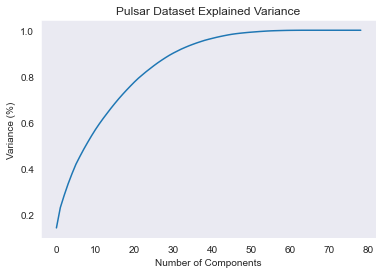

In [283]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [284]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14330862, 0.23124529, 0.28497554, 0.33430007, 0.37851053,
       0.41931375, 0.45245136, 0.48418903, 0.5138791 , 0.54250025,
       0.56953937, 0.59453794, 0.61803423, 0.64033877, 0.6623753 ,
       0.68343215, 0.70364559, 0.72274101, 0.74108114, 0.75875784,
       0.77588569, 0.79194675, 0.80636367, 0.82051556, 0.83367698,
       0.84676941, 0.85914761, 0.87064616, 0.88166996, 0.89205519,
       0.90139305, 0.90991192, 0.91833895, 0.92575062, 0.93279853,
       0.93921803, 0.94530507, 0.95088202, 0.95628691, 0.96085453,
       0.96505782, 0.96920638, 0.97296888, 0.97645413, 0.9797352 ,
       0.98262023, 0.98497284, 0.98697226, 0.9887314 , 0.9903932 ,
       0.99177899, 0.99308805, 0.99437906, 0.99548166, 0.99656172,
       0.99739052, 0.99800519, 0.99847506, 0.99892964, 0.99934258,
       0.9995853 , 0.9997556 , 0.99988652, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [285]:
# From the above numbers 95% of the variance is explained by 35 components

In [286]:
pca = PCA(n_components=35)
X_pca = pca.fit_transform(X_scaled)

In [288]:
y=cars.price
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [312]:
# creating a linear model 
print(X), print(y)
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.20, random_state=5)


     wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0         88.6      168.8      64.1       48.8        2548       130.0   
1         88.6      168.8      64.1       48.8        2548       130.0   
2         94.5      171.2      65.5       52.4        2823       152.0   
3         99.8      176.6      66.2       54.3        2337       109.0   
4         99.4      176.6      66.4       54.3        2824       136.0   
..         ...        ...       ...        ...         ...         ...   
200      109.1      188.8      68.9       55.5        2952       141.0   
201      109.1      188.8      68.8       55.5        3049       141.0   
202      109.1      188.8      68.9       55.5        3012       173.0   
203      109.1      188.8      68.9       55.5        3217       145.0   
204      109.1      188.8      68.9       55.5        3062       141.0   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0         3.47    2.68               

In [313]:
len(y_train)

164

## 3. Model Building and Evaluation

In [314]:
# fitting a linear model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

print(lm.coef_)

[2004.58928069  594.2870586   167.21644445  147.33021274 -737.29102034
 -759.08701075  281.92781019  653.23998664  411.83727593 -194.29181535
  260.3381661    98.42614336  418.86258386  387.36171775  145.43563581
 -140.08240484 -390.59679555 -329.11298056 -377.1454026   632.41409284
  -24.47348477 -649.66073353  999.30445714  404.2071821  -275.75946293
 -456.76712308  -13.92776706  482.18325303  348.60899033 -563.51249876
   72.14733131 -453.03619706  232.47952238  -57.49204989  173.54900807]


In [315]:
# print coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[2004.58928069  594.2870586   167.21644445  147.33021274 -737.29102034
 -759.08701075  281.92781019  653.23998664  411.83727593 -194.29181535
  260.3381661    98.42614336  418.86258386  387.36171775  145.43563581
 -140.08240484 -390.59679555 -329.11298056 -377.1454026   632.41409284
  -24.47348477 -649.66073353  999.30445714  404.2071821  -275.75946293
 -456.76712308  -13.92776706  482.18325303  348.60899033 -563.51249876
   72.14733131 -453.03619706  232.47952238  -57.49204989  173.54900807]
13193.218088160675


In [316]:
# Get all the model performace parameters
# we can get train error

y_train_pred=lm.predict(X_train)

from sklearn import metrics

mean_l1_error_train=metrics.mean_absolute_error(y_train,y_train_pred)
mean_l2_error_train=metrics.mean_squared_error(y_train,y_train_pred)
Rootmean_l2_error_train=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))

train_accuracy = lm.score(X_train, y_train)
# lm.score(x_train,y_train) same as above 
print("mean_l1_error_train is {} mean_l2_error_train is {} Rootmean_l2_error_train is {} and accuracy is {}".format(mean_l1_error_train,mean_l2_error_train,Rootmean_l2_error_train,train_accuracy))

mean_l1_error_train is 1614.1798881045493 mean_l2_error_train is 4574172.91100425 Rootmean_l2_error_train is 2138.7316126630403 and accuracy is 0.9264881903893324


In [317]:
y_train_pred

array([11142.93489816,  9858.91744611,  4935.02935089, 15053.89511612,
       17710.38849625, 14692.68139202,  6087.24325967, 38169.12011981,
       14863.84354068,  7581.70603179,  8177.6565484 , 12162.86764422,
        9247.62289918,  6088.23141031, 14169.54179308, 12400.04589093,
       16391.28347077, 11182.4641674 , 10940.0689216 , 15627.16131676,
       17253.76015463, 11185.56698477, 11387.96474497, 11978.02334557,
       14623.43769161,  6505.0141433 ,  5326.15469267, 11132.11269982,
        7839.183183  , 24050.2073733 , 17795.90373364, 33723.20442174,
       10415.86367193,  7379.07325904, 12169.16252608, 15069.05655618,
       10816.51877552, 11907.02279095,  7993.58308919,  6461.33925637,
        5896.5037123 , 28228.77452647, 16137.40457801, 18528.4064523 ,
        9648.62705188, 18205.29768152, 18086.77362722,  8115.49258899,
       16952.74843635, 17027.56919849,  5105.32198509,  9967.98957031,
        4961.13996869, 13262.54538384,  9259.96177748,  7678.93792031,
      

In [318]:
# model parameters and annova
X_train_final=sm.add_constant(X_train)
model_object=sm.OLS(y_train,X_train_final)
model=model_object.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     46.09
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           4.79e-57
Time:                        10:44:42   Log-Likelihood:                -1490.3
No. Observations:                 164   AIC:                             3053.
Df Residuals:                     128   BIC:                             3164.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.319e+04    193.186     68.293      0.0

In [319]:
y_train

46     11048.0
183     7975.0
98      8249.0
197    16515.0
101    13499.0
        ...   
73     40960.0
144     9233.0
118     5572.0
189    11595.0
99      8949.0
Name: price, Length: 164, dtype: float64

In [320]:
idk = pd.Series(y_train_pred, index=y_train)
idk

price
11048.0    11142.934898
7975.0      9858.917446
8249.0      4935.029351
16515.0    15053.895116
13499.0    17710.388496
               ...     
40960.0    38408.552948
9233.0     10823.981142
5572.0      5151.838430
11595.0    13394.729932
8949.0      7039.297685
Length: 164, dtype: float64

In [321]:
# Get the model tested on test data

y_test_pred=lm.predict(X_test)
y_test_pred

array([ 7168.92321574,  6081.00541272, 18639.77015487, 28937.47110945,
        7656.96472044, 17292.96869755, 19232.84977516,  7632.62354312,
        5534.89383903,  7470.03504387,  5617.67570845,  7632.62354312,
        6940.93236899, 14913.38869673,  8097.50009501,  8413.50439094,
       13268.8402657 , 36533.26711584,  4786.20352365,  4848.7125704 ,
        4158.63717785, 10712.68145072, 11620.67024475, 15936.25969178,
       11132.11269982, 10942.20910953, 10159.04019635,  5537.55279552,
       16752.69620001,  8222.46010705,  9150.9478818 ,  5066.8004662 ,
       17368.79666708, 17371.00554644, 11254.79086639,  9552.69332828,
       12162.86764422, 30519.01483515, 33723.20442174,  7030.72205414,
       10676.72389733])

In [322]:
mean_l1_error_test=metrics.mean_absolute_error(y_test,y_test_pred)
mean_l2_error_test=metrics.mean_squared_error(y_test,y_test_pred)
Rootmean_l2_error_test=round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),4)

test_accuracy = lm.score(X_test, y_test)

print("mean_l1_error_test is {} mean_l2_error_test is {} Rootmean_l2_error_test is {} and rmse_test is {}".format(mean_l1_error_test,mean_l2_error_test,Rootmean_l2_error_test,test_accuracy))

mean_l1_error_test is 1800.5434965148374 mean_l2_error_test is 5855926.903137174 Rootmean_l2_error_test is 2419.9023 and rmse_test is 0.9142799961931167


In [323]:
idk2 = pd.Series(y_test_pred, index=y_test)
idk2

price
7898.0      7168.923216
5572.0      6081.005413
18420.0    18639.770155
35550.0    28937.471109
7129.0      7656.964720
12940.0    17292.968698
17710.0    19232.849775
6692.0      7632.623543
7788.0      5534.893839
7609.0      7470.035044
7053.0      5617.675708
7609.0      7632.623543
7603.0      6940.932369
15040.0    14913.388697
11248.0     8097.500095
9495.0      8413.504391
14489.0    13268.840266
34184.0    36533.267116
6189.0      4786.203524
7349.0      4848.712570
6488.0      4158.637178
9279.0     10712.681451
10345.0    11620.670245
18150.0    15936.259692
10595.0    11132.112700
8921.0     10942.209110
13950.0    10159.040196
6918.0      5537.552796
16845.0    16752.696200
7395.0      8222.460107
8195.0      9150.947882
7799.0      5066.800466
22625.0    17368.796667
13295.0    17371.005546
8845.0     11254.790866
8013.0      9552.693328
11845.0    12162.867644
36880.0    30519.014835
32528.0    33723.204422
6095.0      7030.722054
10295.0    10676.723897
dtype: flo

In [324]:
# The training and the testing scores are very close to each other